In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import pastas as ps

%load_ext autoreload
%autoreload 2

### Gamma

In [9]:
ps.Gamma.impulse

In [10]:
A = 5
n = 1.5
a = 50
p = [A, n, a]

gamma = ps.Gamma()
tmax = gamma.get_tmax(p)
t = np.arange(0, tmax)

step = gamma.step(p)
stepnum = np.zeros(len(t))
for i in range(1, len(t)):
    stepnum[i] = quad(gamma.impulse, 0, t[i], args=(p))[0]

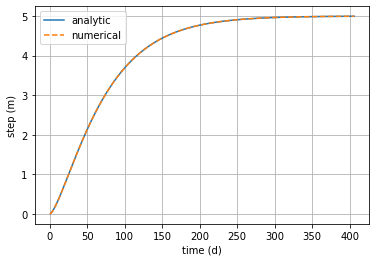

In [11]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum, "--", label="numerical")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
plt.legend();

### Exponential

In [12]:
ps.Exponential.impulse

In [13]:
A = 5
a = 50
p = [A, a]

exponential = ps.Exponential()
tmax = exponential.get_tmax(p)
t = np.arange(0, tmax)

step = exponential.step(p)
stepnum = np.zeros(len(t))
for i in range(1, len(t)):
    stepnum[i] = quad(exponential.impulse, 0, t[i], args=(p))[0]

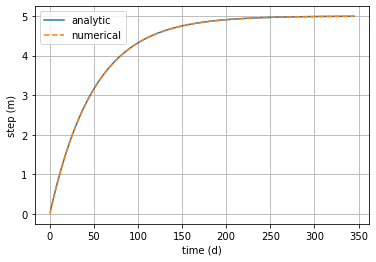

In [14]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum, "--", label="numerical")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
plt.legend();

### Hantush

In [15]:
ps.Hantush.impulse

In [16]:
A = 5
a = 50
b = 2
p = [A, a, b]

hantush = ps.Hantush()
tmax = hantush.get_tmax(p)
t = np.arange(0, tmax)

step = hantush.step(p)
stepnum = np.zeros(len(t))
for i in range(1, len(t)):
    stepnum[i] = quad(hantush.impulse, 0, t[i], args=(p))[0]

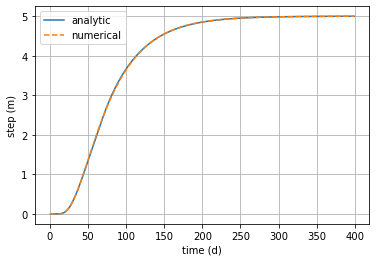

In [17]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum, "--", label="numerical")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
plt.legend();

### Polder - not correct yet

In [18]:
ps.Polder.impulse

In [19]:
ps.Polder.polder_function

In [20]:
A = np.exp(-1)
a = 100
b = 0.25
p = [A, a, b]

polder = ps.Polder()
tmax = polder.get_tmax(p)
t = np.arange(0, tmax)

step = polder.step(p)
stepnum = np.zeros(len(t))
for i in range(1, len(t)):
    stepnum[i] = quad(polder.impulse, 0, t[i], args=(p))[0]

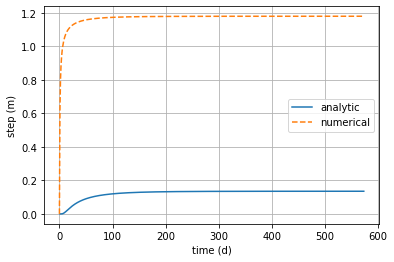

In [21]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum, "--", label="numerical")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
plt.legend();

### Four-parameter function

In [22]:
ps.FourParam.impulse

In [23]:
A = 1 # impulse response implemented for A=1 only
n = 1.5
a = 50
b = 10
p = [A, n, a, b]

fourparam = ps.FourParam(quad=False) # use simple integration
tmax = fourparam.get_tmax(p)
t = np.arange(0, tmax)

step = fourparam.step(p)
stepnum = np.zeros(len(t))
for i in range(1, len(t)):
    stepnum[i] = quad(fourparam.impulse, 0, t[i], args=(p))[0]
stepnum = stepnum / quad(fourparam.impulse, 0, np.inf, args=p)[0] # four param is scaled at the end 

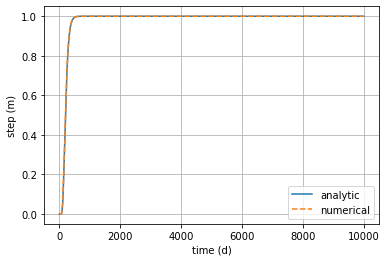

In [24]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum, "--", label="numerical")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
plt.legend();

### Double exponential function

In [25]:
ps.DoubleExponential.impulse

In [26]:
A = 5 # impulse response implemented for A=1 only
a = 10
b = 50
f = 0.4
p = [A, f, a, b]

doubexp = ps.DoubleExponential()
tmax = doubexp.get_tmax(p)
t = np.arange(0, tmax)

step = doubexp.step(p)
stepnum = np.zeros(len(t))
for i in range(1, len(t)):
    stepnum[i] = quad(doubexp.impulse, 0, t[i], args=(p))[0]

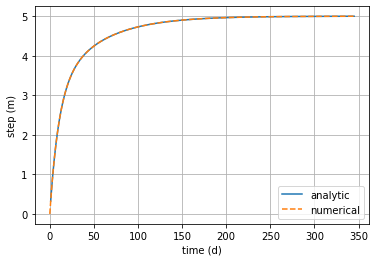

In [27]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum, "--", label="numerical")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
plt.legend();

### Edelman

In [28]:
ps.Edelman.impulse

In [59]:
a = 10
p = [a]

edel = ps.Edelman()
tmax = edel.get_tmax(p)
t = np.arange(0, tmax)

#step = edel.step(p)
stepnum = np.zeros(len(t))
for i in range(1, len(t)):
    stepnum[i] = quad(edel.impulse, 1e-3, t[i], args=(p))[0]

/var/folders/9x/5ftyyy7d065bf_fl790_tcrm0000gn/T/ipykernel_1413/4160822555.py:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  stepnum[i] = quad(edel.impulse, 1e-3, t[i], args=(p))[0]


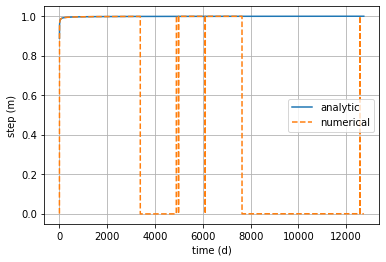

In [30]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum, "--", label="numerical")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
plt.legend();

In [57]:
t = np.arange(0.0, 50)
print(t[0])
t[0] = 0.9
print(t)

0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


[ 0.9  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
 14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
 28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
 42.  43.  44.  45.  46.  47.  48.  49. ]


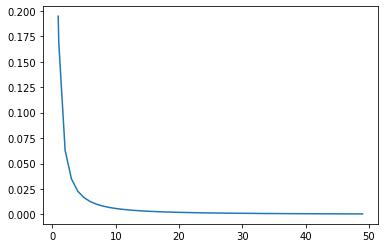

In [58]:
t = np.arange(0.0, 50)
t[0] = 0.9
print(t)
h = ps.Edelman.impulse(t, [a])
plt.plot(t, h)

In [52]:
1 / (np.sqrt(np.pi) * a * t ** 1.5)

/var/folders/9x/5ftyyy7d065bf_fl790_tcrm0000gn/T/ipykernel_1413/2404387558.py:1: RuntimeWarning: divide by zero encountered in true_divide
  1 / (np.sqrt(np.pi) * a * t ** 1.5)


array([       inf, 0.18806319, 0.06649038, 0.03619278, 0.0235079 ,
       0.01682088, 0.01279608, 0.01015446, 0.0083113 , 0.0069653 ,
       0.00594708, 0.00515484, 0.0045241 , 0.00401226, 0.00359014,
       0.00323718, 0.00293849, 0.00268306, 0.00246261, 0.00227077,
       0.00210261, 0.00195423, 0.00182251, 0.00170495, 0.00159951,
       0.00150451, 0.00141855, 0.00134047, 0.00126931, 0.00120422,
       0.00114452, 0.00108959, 0.00103891, 0.00099205, 0.00094861,
       0.00090824, 0.00087066, 0.00083561, 0.00080284, 0.00077216,
       0.00074339, 0.00071635, 0.00069092, 0.00066696, 0.00064435,
       0.000623  , 0.00060279, 0.00058366, 0.00056551, 0.00054829])

In [63]:
import pastas as ps

In [74]:
gam = ps.Gamma(cutoff=0.99)

TypeError: __init__() got an unexpected keyword argument 'cutoff'

In [73]:
edel = ps.Edelman()
tmax = edel.get_tmax([10], cutoff=0.9)
edel.step([10], cutoff=0.99)

array([0.88753708, 0.92034433, 0.93492531, 0.94362802, 0.94957097,
       0.95395969, 0.95737158, 0.96012239, 0.96240129, 0.96432941,
       0.96598839, 0.96743555, 0.96871242, 0.96984998, 0.97087185,
       0.9717964 , 0.97263815, 0.97340877, 0.97411775, 0.97477288,
       0.97538066, 0.97594652, 0.97647508, 0.97697026, 0.97743543,
       0.9778735 , 0.97828701, 0.97867818, 0.97904893, 0.979401  ,
       0.97973589, 0.98005496, 0.98035942, 0.98065035, 0.98092873,
       0.98119542, 0.98145123, 0.98169688, 0.98193302, 0.98216025,
       0.98237911, 0.98259011, 0.98279371, 0.98299033, 0.98318036,
       0.98336416, 0.98354207, 0.98371438, 0.98388139, 0.98404337,
       0.98420056, 0.9843532 , 0.98450149, 0.98464565, 0.98478586,
       0.9849223 , 0.98505513, 0.98518451, 0.98531058, 0.9854335 ,
       0.98555337, 0.98567034, 0.98578451, 0.98589599, 0.9860049 ,
       0.98611131, 0.98621534, 0.98631706, 0.98641657, 0.98651393,
       0.98660923, 0.98670254, 0.98679392, 0.98688345, 0.98697

In [61]:
from scipy.special import erfc

In [62]:
erfc(0)

1.0